In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 30s 3us/step


In [5]:
print(len(X_train))
print(len(X_test))

60000
10000


In [6]:
X_train[0].shape

(28, 28)

5


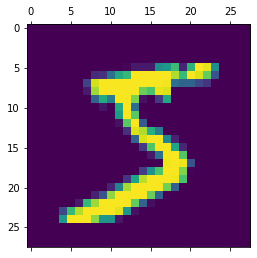

In [7]:
plt.matshow(X_train[0]);
print(y_train[0])

In [8]:
X_train.shape


(60000, 28, 28)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4644 - accuracy: 0.8784
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9149
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9257
Epoch 6/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2623 - accuracy: 0.9264
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9287


In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2667 - accuracy: 0.9262


[0.2667146325111389, 0.9261999726295471]

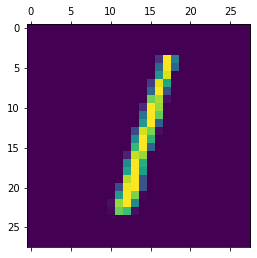

In [13]:
plt.matshow(X_test[2])

In [14]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [15]:
np.argmax(y_predicted[2])

1

In [16]:
y_predicted[0]

array([1.4282283e-02, 8.2072063e-08, 3.5688438e-02, 9.6889174e-01,
       2.1939154e-03, 1.3307492e-01, 3.7089151e-07, 9.9983877e-01,
       6.4760879e-02, 6.4722890e-01], dtype=float32)

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [18]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## confusion matrix

In [19]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,   10,  918,   21,    8,    3,   13,   10,   39,    3],
       [   2,    0,   18,  938,    0,   18,    2,   11,   15,    6],
       [   1,    1,    2,    2,  917,    0,   13,    4,   10,   32],
       [   8,    3,    2,   45,    7,  773,   16,    8,   26,    4],
       [  10,    3,    5,    1,    7,   13,  916,    2,    1,    0],
       [   1,    7,   21,    8,    8,    1,    0,  954,    2,   26],
       [   9,   10,    5,   32,    8,   26,   10,   12,  853,    9],
       [  11,    7,    1,   13,   28,    6,    0,   24,    3,  916]])>

Text(69.0, 0.5, 'truth')

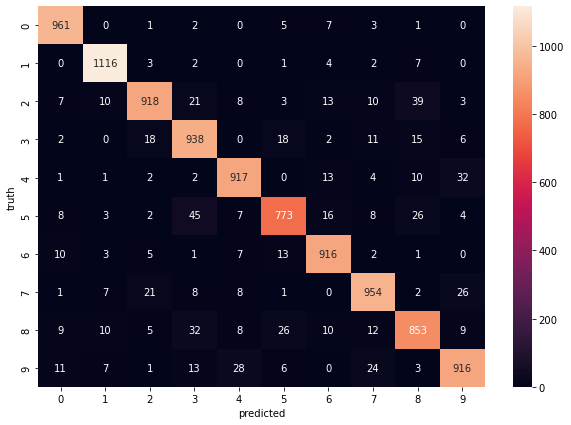

In [20]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2712 - accuracy: 0.9234
Epoch 2/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1223 - accuracy: 0.9639
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0870 - accuracy: 0.9738
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 5/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9836
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9870
Epoch 7/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9894


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0763 - accuracy: 0.9754


[0.07628212869167328, 0.9753999710083008]

313/313 [==============================] - 1s 1ms/step


Text(69.0, 0.5, 'truth')

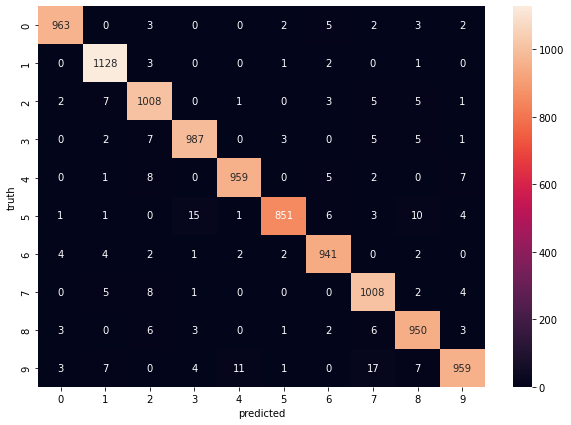

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/adam', histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7, callbacks=[tb_callback])

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2736 - accuracy: 0.9236
Epoch 2/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1274 - accuracy: 0.9626
Epoch 3/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0895 - accuracy: 0.9731
Epoch 4/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9839
Epoch 6/7
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9864
Epoch 7/7
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0351 - accuracy: 0.9892


In [25]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 14436.